## Import libraries

In [2]:
import numpy as np
import keras
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

from sklearn.model_selection import train_test_split 
import tensorflow as tf
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [3]:
#import functions
import sys

# Add the directory containing your file to Python's search path
sys.path.append(r'C:\Users\rishi\OneDrive - Monash University\Documents\Monash\Sonorus\sonorus all')

# Now you can import the function from the file
from Model_evaluation import model_evaluation
from wavenet import wavenet_train, prep_data

## Load data

In [4]:
#get nuie data
specs_nuie = np.load(r"C:\Users\rishi\OneDrive - Monash University\Documents\Monash\Sonorus\Sonorus - nuie data\preprocessed data\specs segmented.npy")
outcome_nuie = np.load(r"C:\Users\rishi\OneDrive - Monash University\Documents\Monash\Sonorus\Sonorus - nuie data\preprocessed data\outcome segmented.npy")
#get physionet data
specs_physionet = np.load(r"C:\Users\rishi\OneDrive - Monash University\Documents\Monash\Sonorus\sonorus - physionet data\Preprocessed data\Segmented\specs_segmented.npy")
outcome_physionet = np.load(r"C:\Users\rishi\OneDrive - Monash University\Documents\Monash\Sonorus\Sonorus - physionet data\Preprocessed data\Segmented\outcomes_segmented.npy")

In [5]:
#join both datasets
#pad zeroes to nuie data 
specs_nuie_padded = np.zeros((specs_nuie.shape[0],specs_physionet.shape[1],specs_physionet.shape[2]))
specs_nuie_padded[:specs_nuie.shape[0],:specs_nuie.shape[1],:specs_nuie.shape[2]] = specs_nuie


In [6]:
specs_nuie_padded.shape

(7740, 128, 216)

In [7]:
#join both datasets
#pad zeroes to nuie data outcome
outcome_nuie_padded = np.zeros((outcome_nuie.shape[0],outcome_physionet.shape[1]))
outcome_nuie_padded[:outcome_nuie.shape[0],:outcome_nuie.shape[1]] = outcome_nuie


In [8]:
#concatenate
specs = np.concatenate((specs_nuie_padded,specs_physionet),axis=0)
outcome = np.concatenate((outcome_nuie_padded,outcome_physionet),axis=0)

## Split data

In [9]:
#splitting the data into training and testing
specs_train, specs_test, outcomes_train, outcomes_test = train_test_split(specs, outcome, test_size=0.2, random_state=42)

## Model

In [10]:
specs_train, specs_test = prep_data(specs_train, specs_test)

In [11]:
#model
wavenet = wavenet_train(specs_train, specs_test, outcomes_train, outcomes_test)

c:\Users\rishi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\layer.py:359: UserWarning: `build()` was called on layer 'wave_net_model', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Epoch 1/3
6291/6291 ━━━━━━━━━━━━━━━━━━━━ 4890s 776ms/step - accuracy: 0.6522 - loss: 0.7348 - val_accuracy: 0.6473 - val_loss: 0.6091
Epoch 2/3
6291/6291 ━━━━━━━━━━━━━━━━━━━━ 4815s 765ms/step - accuracy: 0.6657 - loss: 0.5988 - val_accuracy: 0.6581 - val_loss: 0.6015
Epoch 3/3
6291/6291 ━━━━━━━━━━━━━━━━━━━━ 5175s 823ms/step - accuracy: 0.7000 - loss: 0.5674 - val_accuracy: 0.6730 - val_loss: 0.6148


In [ ]:
#from Model_evaluation import model_evaluation
specs_physionet_train, specs_physionet_test, outcomes_physionet_train, outcomes_physionet_test = train_test_split(specs_physionet, outcome_physionet, test_size=0.2, random_state=42)
specs_physionet_train,specs_physionet_test = prep_data(specs_physionet_train,specs_physionet_test)
model_evaluation(wavenet,specs_physionet_train,specs_physionet_test,outcomes_physionet_train,outcomes_physionet_test,threshold=0.60,evaluate=False,reshape_outcome=True) 


Model Evaluation:
590/590 ━━━━━━━━━━━━━━━━━━━━ 1486s 3s/step
Train set:
Train Accuracy: 0.8078635014836796 | Sensitivity: 0.6398204012908657 | Specificity: 0.9098339719029375


148/148 ━━━━━━━━━━━━━━━━━━━━ 341s 2s/step
Test set:
Accuracy:  0.6668079694785927 | Sensitivity: 0.47913093196112067 | Specificity: 0.7773661165375547


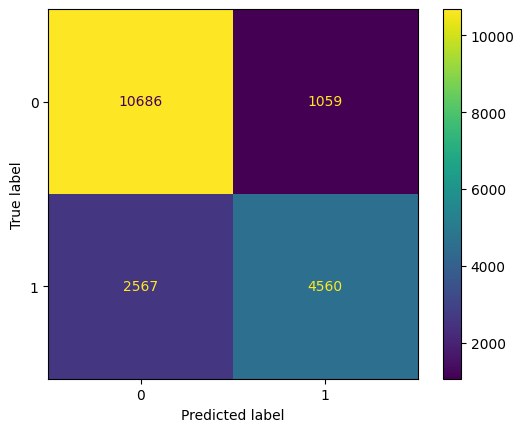

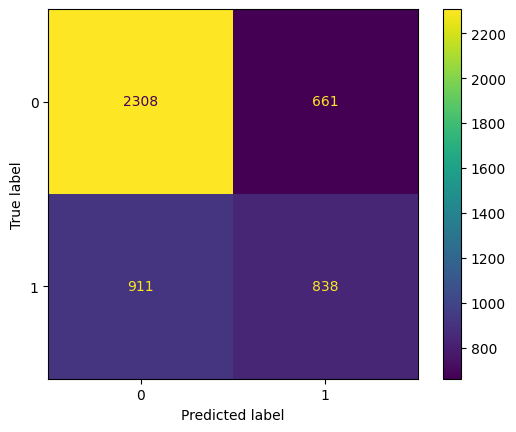

In [17]:
#from Model_evaluation import model_evaluation
model_evaluation(wavenet, specs_train, specs_test, outcomes_train, outcomes_test, threshold=0.60, evaluate=False, reshape_outcome=True)

Model Evaluation:
194/194 ━━━━━━━━━━━━━━━━━━━━ 460s 2s/step
Train set:
Train Accuracy: 0.8464147286821705 | Sensitivity: 0.0 | Specificity: 1.0


49/49 ━━━━━━━━━━━━━━━━━━━━ 113s 2s/step
Test set:
Accuracy:  0.8352713178294574 | Sensitivity: 0.0 | Specificity: 1.0


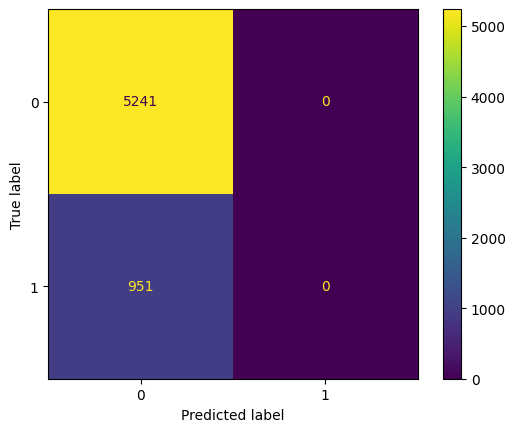

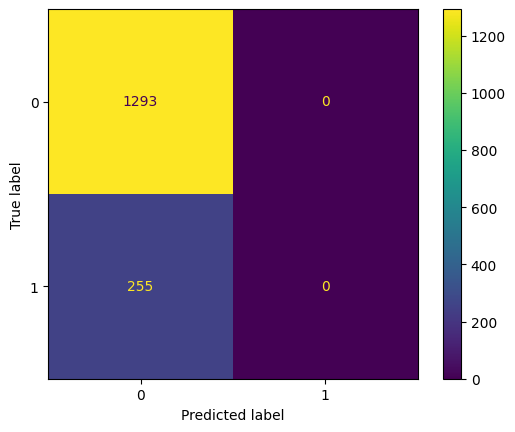

In [28]:
#from Model_evaluation import model_evaluation
specs_nuie_train, specs_nuie_test, outcomes_nuie_train, outcomes_nuie_test = train_test_split(specs_nuie_padded, outcome_nuie_padded, test_size=0.2, random_state=42)
specs_nuie_train,specs_nuie_test = prep_data(specs_nuie_train,specs_nuie_test)
model_evaluation(wavenet,specs_nuie_train,specs_nuie_test,outcomes_nuie_train,outcomes_nuie_test,threshold=0.60,evaluate=False,reshape_outcome=True) 

Model Evaluation:
194/194 ━━━━━━━━━━━━━━━━━━━━ 477s 2s/step
Train set:
Train Accuracy: 0.8464147286821705 | Sensitivity: 0.0 | Specificity: 1.0


49/49 ━━━━━━━━━━━━━━━━━━━━ 122s 2s/step
Test set:
Accuracy:  0.8352713178294574 | Sensitivity: 0.0 | Specificity: 1.0


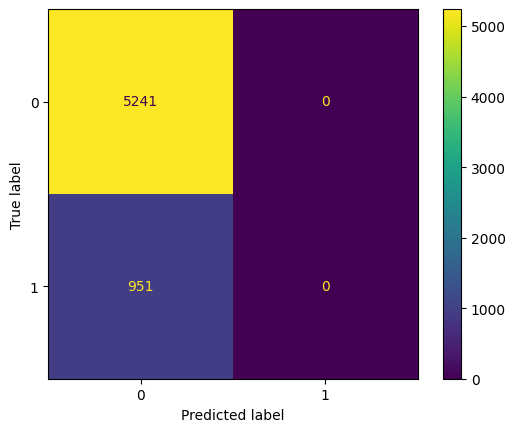

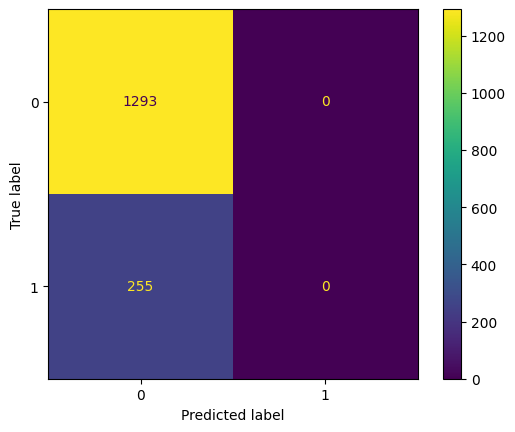

In [30]:
model_evaluation(wavenet,specs_nuie_train,specs_nuie_test,outcomes_nuie_train,outcomes_nuie_test,threshold=0.70,evaluate=False,reshape_outcome=True) 

Model Evaluation:
397/397 ━━━━━━━━━━━━━━━━━━━━ 1027s 3s/step
Train set:
Train Accuracy: 0.747397476340694 | Sensitivity: 0.7017114914425427 | Specificity: 0.7902215431627196


100/100 ━━━━━━━━━━━━━━━━━━━━ 235s 2s/step
Test set:
Accuracy:  0.7511041009463723 | Sensitivity: 0.7120521172638437 | Specificity: 0.7877675840978593


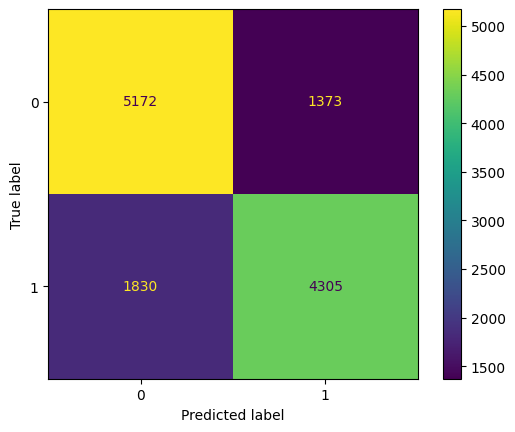

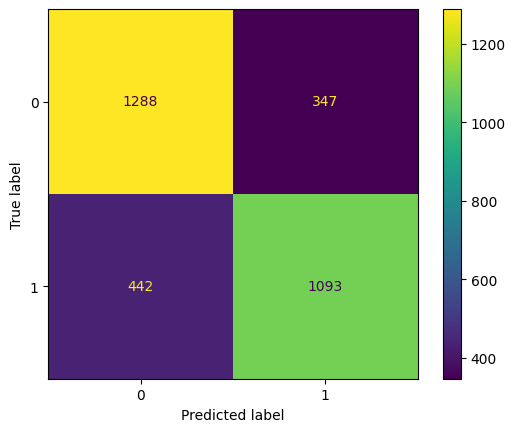

In [31]:
#from Model_evaluation import model_evaluation
specs_physionet_train, specs_physionet_test, outcomes_physionet_train, outcomes_physionet_test = train_test_split(specs_physionet, outcome_physionet, test_size=0.2, random_state=42)
specs_physionet_train,specs_physionet_test = prep_data(specs_physionet_train,specs_physionet_test)
model_evaluation(wavenet,specs_physionet_train,specs_physionet_test,outcomes_physionet_train,outcomes_physionet_test,threshold=0.60,evaluate=False,reshape_outcome=True) 


Model Evaluation:
397/397 ━━━━━━━━━━━━━━━━━━━━ 1000s 3s/step
Train set:
Train Accuracy: 0.7446372239747634 | Sensitivity: 0.626079869600652 | Specificity: 0.8557677616501146


100/100 ━━━━━━━━━━━━━━━━━━━━ 284s 3s/step
Test set:
Accuracy:  0.749211356466877 | Sensitivity: 0.6371335504885993 | Specificity: 0.854434250764526


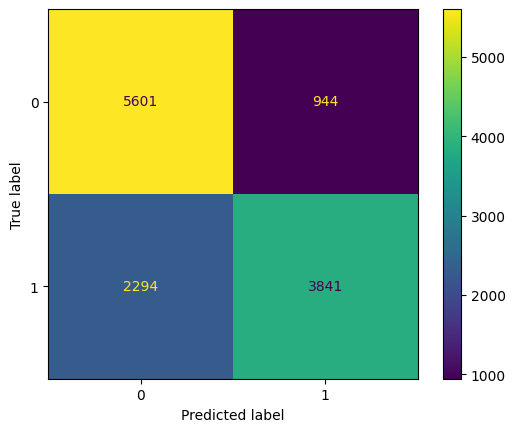

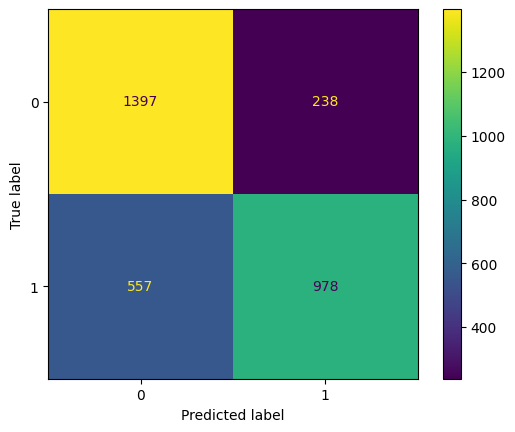

In [32]:
#from Model_evaluation import model_evaluation
specs_physionet_train, specs_physionet_test, outcomes_physionet_train, outcomes_physionet_test = train_test_split(specs_physionet, outcome_physionet, test_size=0.2, random_state=42)
specs_physionet_train,specs_physionet_test = prep_data(specs_physionet_train,specs_physionet_test)
model_evaluation(wavenet,specs_physionet_train,specs_physionet_test,outcomes_physionet_train,outcomes_physionet_test,threshold=0.50,evaluate=False,reshape_outcome=True) 